<a href="https://colab.research.google.com/github/FrumsM/Titanic-Machine-Learning-from-Disaster/blob/main/titanic_survived_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

Проект основан на участии в сорвеновании Kaggle: https://www.kaggle.com/competitions/titanic

Цель проекта - предсказать какие пассажиры выживут, а какие нет, используя основные алгоритмы классификации:


*   Логистическая регрессия (LogisticRegression);
*   K-NN метод (KNeighborsClassifier);
*   Метод опорных векторов (SVC);
*   Наивный байесовский классификатор (GaussianNB);
*   Дерево решений (DecisionTreeClassifier);
*   Случайные деревья решений (RandomForestClassifier).


Описание датасетов:

*   df_train - тренировочный датасет;
*   df_test - тестовый датасет;
*   submission - образец файла отправки в правильном формате.

Метрика: Accuracy



# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from google.colab import *

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

# Загрузка датасетов

In [2]:
drive.mount('/content/drive')
path1 = '/content/drive/My Drive/Datasets/titanic_test.csv'
path2 = '/content/drive/My Drive/Datasets/titanic_train.csv'
path3 = '/content/drive/My Drive/Datasets/titanic_submission.csv'
df_test = pd.read_csv(path1)
df_train = pd.read_csv(path2)
submission = pd.read_csv(path3)

Mounted at /content/drive


In [3]:
df = pd.concat([df_train, df_test])

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
503,504,0.0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
62,63,0.0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
177,178,0.0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
37,929,NaN,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S
80,972,NaN,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,NaN,C


In [5]:
submission.sample(5)

,PassengerId,Survived
37,929,1
264,1156,0
35,927,0
408,1300,1
317,1209,0


# Анализ датасета

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Кол-во стро и столбцов датасета:

In [7]:
df.shape

(1309, 12)

Информация о датасете:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Описание датасета:

*   PassengerId - id пассажира;
*   Survived - выжил ли пассажир;
*   Pclass - класс билета (1 = 1-ый, 2 = 2-ой, 3 = 3-ий);
*   Name - имя пассажира;
*   Sex - пол пассажира;
*   Age - возраст пассажира;
*   SibSp - кол-во братьев/систер/супругов;
*   Parch - кол-во родителей/детей;
*   Ticket - номер билета;
*   Fare - цена билета;
*   Cabin - кабина коробля;
*   Embarked - название порта с которого сел пассажир (C = Cherbourg, Q = Queenstown, S = Southampton).


Кол-во пропущенных значений в каждом столбце:

In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
pd.options.display.float_format = '{:.2f}'.format

Описание нечисловых признаков:

In [11]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


Описание числовых признаков:

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,891.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.49,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


Кол-во уникальных значений в каждом столбце:

In [13]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

Тепловая карта зависимости числовых признаков:

<ipython-input-14-77374f77564c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap= 'coolwarm', linewidths=2, linecolor='black')


<Axes: >

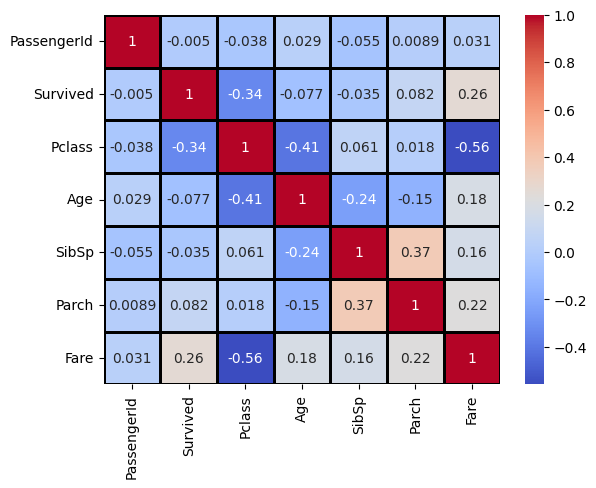

In [14]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap= 'coolwarm', linewidths=2, linecolor='black')

# Предобработка и EDA

In [15]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
346,347,1.00,2,"Smith, Miss. Marion Elsie",female,40.00,0,0,31418,13.00,NaN,S
77,969,NaN,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.00,2,0,11770,25.70,C101,S
193,1085,NaN,2,"Lingane, Mr. John",male,61.00,0,0,235509,12.35,NaN,Q
653,654,1.00,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.83,NaN,Q
18,19,0.00,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.00,NaN,S


In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Поработаем с пропущенными значениями "Embarked"

In [17]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.00,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN
829,830,1.00,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN


Составим график распределения портов

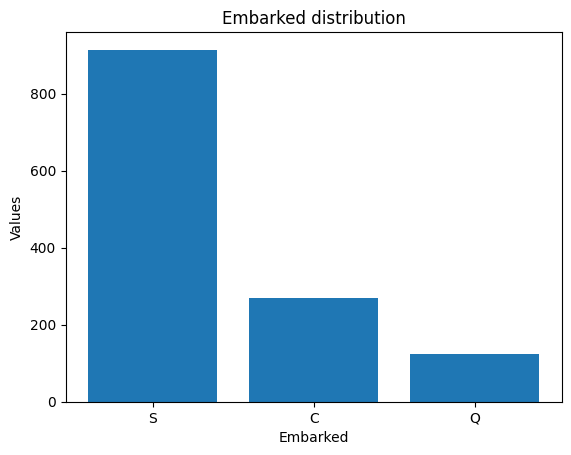

In [18]:
plt.bar(df['Embarked'].value_counts().index, df['Embarked'].value_counts())

plt.xlabel('Embarked')
plt.ylabel('Values')
plt.title('Embarked distribution')

plt.show()

Заменим пропущенные значения самым популярным портом (в гугле также нашел информацию, что эти 2 пассажира взашли на борт из Саутгемптона)

In [19]:
df['Embarked'].fillna('S', inplace=True)

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

Поработаем с пропущенными значениями "Age"

In [21]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.00,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
17,18,1.00,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
19,20,1.00,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.22,NaN,C
26,27,0.00,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C
28,29,1.00,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.72,NaN,Q
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.75,NaN,Q
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


Заменим все пустые значения "Age" на среднюю или медиану. Чтобы понять на что заменять NaN построим график распределения возраста

<ipython-input-22-0392fa4f5ab0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age['Age'] = Age['Age'].round().astype(int)


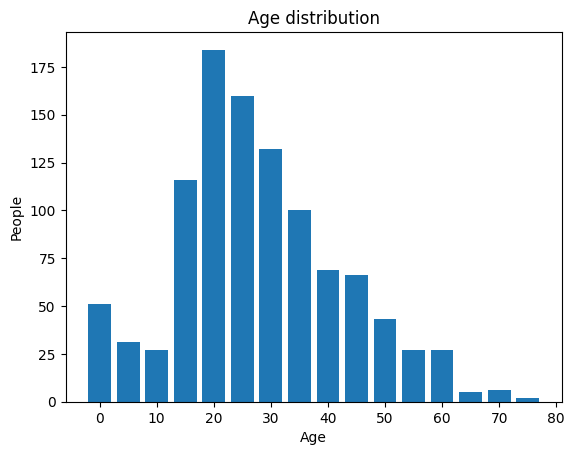

In [22]:
Age = df.dropna(subset=['Age'])
Age['Age'] = Age['Age'].round().astype(int)
plt.hist(Age['Age'], bins=range(min(Age['Age']), max(Age['Age']) + 1, 5), rwidth=0.8, align='left')

plt.xlabel('Age')
plt.ylabel('People')
plt.title('Age distribution')


plt.show()


Данные распределены асимметрично. Проверим возраст на выбросы

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe3bf0beb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe3bf0aaa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe3bf0b8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe419622c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe419633d0>],
 'means': []}

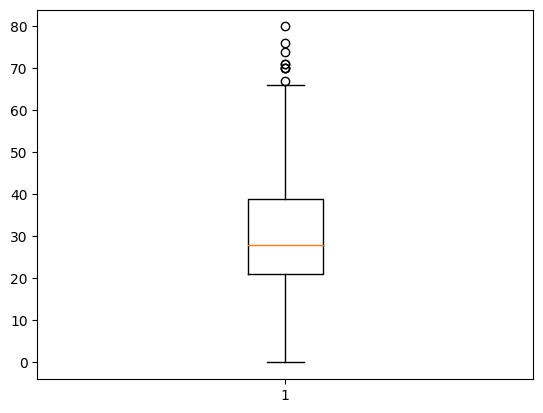

In [23]:
plt.boxplot(x=Age['Age'])

Выбросы также присутствуют. Следовательно, заменим все пропущенные значения на медиану

In [24]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].round().astype(int)

In [25]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

Поработаем с пропущенными значениями "Cabin"

In [26]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Кабин достаточно большое количество, однако можно создать новый признак "Deck", где будут отброшены все цифры. Для всех Nan запишем "M" (Missing)

In [27]:
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else "M")

In [28]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
341,342,1.00,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.00,C23 C25 C27,S,C
540,541,1.00,1,"Crosby, Miss. Harriet R",female,36,0,2,WE/P 5735,71.00,B22,S,B
46,938,NaN,1,"Chevre, Mr. Paul Romaine",male,45,0,0,PC 17594,29.70,A9,C,A
854,855,0.00,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44,1,0,244252,26.00,NaN,S,M
607,608,1.00,1,"Daniel, Mr. Robert Williams",male,27,0,0,113804,30.50,NaN,S,M


Разделим каждую букву на группы. Для этого построим график зависимости буквы палубы от класса

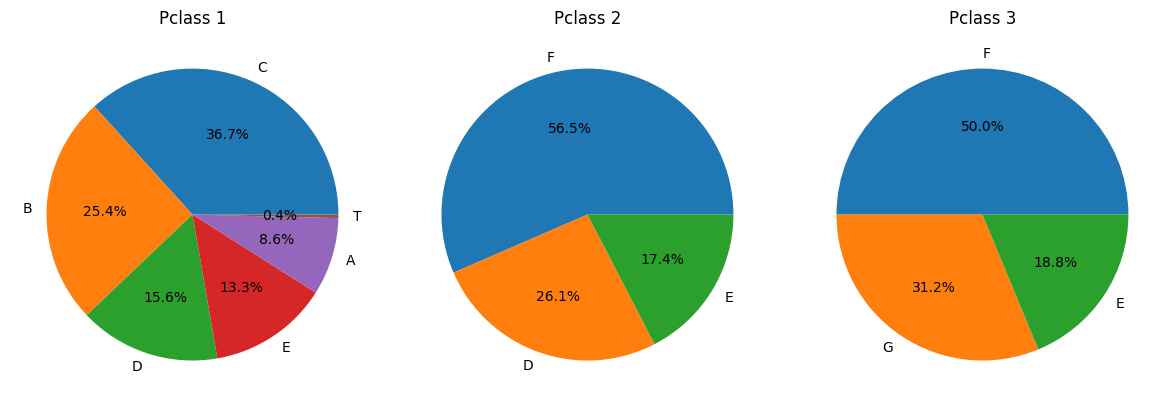

In [29]:
filtered_df = df[df['Deck'] != 'M']

deck_counts = filtered_df.groupby('Pclass')['Deck'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    deck_counts[i+1].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title('Pclass {}'.format(i+1))
    ax.set_ylabel('')


plt.tight_layout()
plt.show()

A, B, C есть только в первом классе - объединим в одну группу. Остальных букв +- одинаковое кол-во в остальных классах. Объединим их в группы поровну

In [30]:
df.loc[df[df['Deck'] == 'T'].index, 'Deck'] = 'A'
df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')
df.drop('Cabin', inplace=True, axis=1)

In [31]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
721,722,0.00,3,"Jensen, Mr. Svend Lauritz",male,17,1,0,350048,7.05,S,M
544,545,0.00,1,"Douglas, Mr. Walter Donald",male,50,1,0,PC 17761,106.42,C,ABC
171,1063,NaN,3,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.22,C,M
237,238,1.00,2,"Collyer, Miss. Marjorie ""Lottie""",female,8,0,2,C.A. 31921,26.25,S,M
230,231,1.00,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35,1,0,36973,83.47,S,ABC


In [32]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
Deck             0
dtype: int64

Поработаем с пропущенными значениями "Fare"

In [33]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
152,1044,NaN,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,S,M


Заменим пропущенное значение медианой

In [34]:
med_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df['Fare'] = df['Fare'].fillna(med_fare)

In [35]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Deck             0
dtype: int64

In [36]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
404,405,0.00,3,"Oreskovic, Miss. Marija",female,20,0,0,315096,8.66,S,M
89,90,0.00,3,"Celotti, Mr. Francesco",male,24,0,0,343275,8.05,S,M
282,1174,NaN,3,"Fleming, Miss. Honora",female,28,0,0,364859,7.75,Q,M
406,407,0.00,3,"Widegren, Mr. Carl/Charles Peter",male,51,0,0,347064,7.75,S,M
217,218,0.00,2,"Jacobsohn, Mr. Sidney Samuel",male,42,1,0,243847,27.00,S,M


Создадим новые признаки. "Family_size" показывает кол-во членов семьи каждого пассажира

In [37]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size
127,1019,NaN,3,"McCoy, Miss. Alicia",female,28,2,0,367226,23.25,Q,M,3
169,1061,NaN,3,"Hellstrom, Miss. Hilda Maria",female,22,0,0,7548,8.96,S,M,1
569,570,1.00,3,"Jonsson, Mr. Carl",male,32,0,0,350417,7.85,S,M,1
381,382,1.00,3,"Nakid, Miss. Maria (""Mary"")",female,1,0,2,2653,15.74,C,M,3
772,773,0.00,2,"Mack, Mrs. (Mary)",female,57,0,0,S.O./P.P. 3,10.50,S,DE,1


Посмотрим на титулы пассажиров. Создадим новый признак с титулами и посмотрим сколько людей какого титула

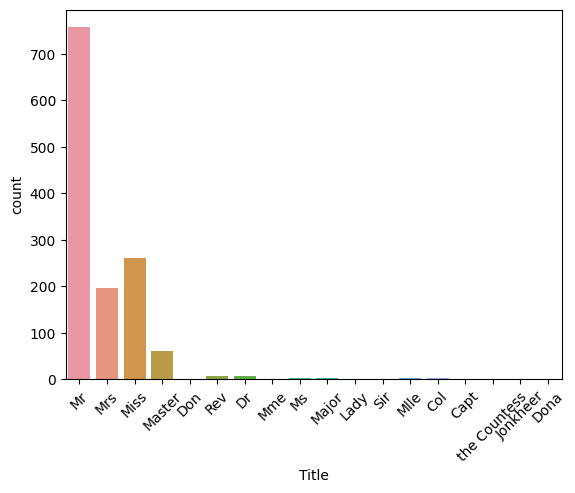

In [38]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
g = sns.countplot(data=df, x='Title')
g = plt.setp(g.get_xticklabels(), rotation=45)

Можно заметить много титулов Mr/Mrs. Создадим признак "is_married"

In [39]:
df['is_married'] = df['Title'].apply(lambda x: 1 if 'Mr' in x or 'Mrs' in x else 0)

In [40]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size,Title,is_married
561,562,0.00,3,"Sivic, Mr. Husein",male,40,0,0,349251,7.90,S,M,1,Mr,1
220,1112,NaN,2,"Duran y More, Miss. Florentina",female,30,1,0,SC/PARIS 2148,13.86,C,M,2,Miss,0
97,989,NaN,3,"Makinen, Mr. Kalle Edvard",male,29,0,0,STON/O 2. 3101268,7.92,S,M,1,Mr,1
659,660,0.00,1,"Newell, Mr. Arthur Webster",male,58,0,2,35273,113.28,C,DE,3,Mr,1
143,1035,NaN,2,"Beauchamp, Mr. Henry James",male,28,0,0,244358,26.00,S,M,1,Mr,1


Объединим титулы в группы

In [41]:
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size,Title,is_married
462,463,0.00,1,"Gee, Mr. Arthur H",male,47,0,0,111320,38.50,S,DE,1,Mr,1
293,294,0.00,3,"Haas, Miss. Aloisia",female,24,0,0,349236,8.85,S,M,1,Miss/Mrs/Ms,0
131,1023,NaN,1,"Gracie, Col. Archibald IV",male,53,0,0,113780,28.50,C,ABC,1,Dr/Military/Noble/Clergy,0
360,1252,NaN,3,"Sage, Master. William Henry",male,14,8,2,CA. 2343,69.55,S,M,11,Master,0
330,1222,NaN,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48,0,2,C.A. 33112,36.75,S,M,3,Miss/Mrs/Ms,1


Удалим ненужные колонки

In [43]:
df = df.drop(columns = ['Name', 'Ticket'], axis = 1)
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size,Title,is_married
61,62,1.00,1,female,38,0,0,80.00,S,ABC,1,Miss/Mrs/Ms,0
539,540,1.00,1,female,22,0,2,49.50,C,ABC,3,Miss/Mrs/Ms,0
43,44,1.00,2,female,3,1,2,41.58,C,M,4,Miss/Mrs/Ms,0
748,749,0.00,1,male,19,1,0,53.10,S,DE,2,Mr,1
662,663,0.00,1,male,47,0,0,25.59,S,DE,1,Mr,1


Посмотрим как титулы влияют на класс в котором ехали пассажиры. Для начала построим диаграммы соотношения супругов к незамужним

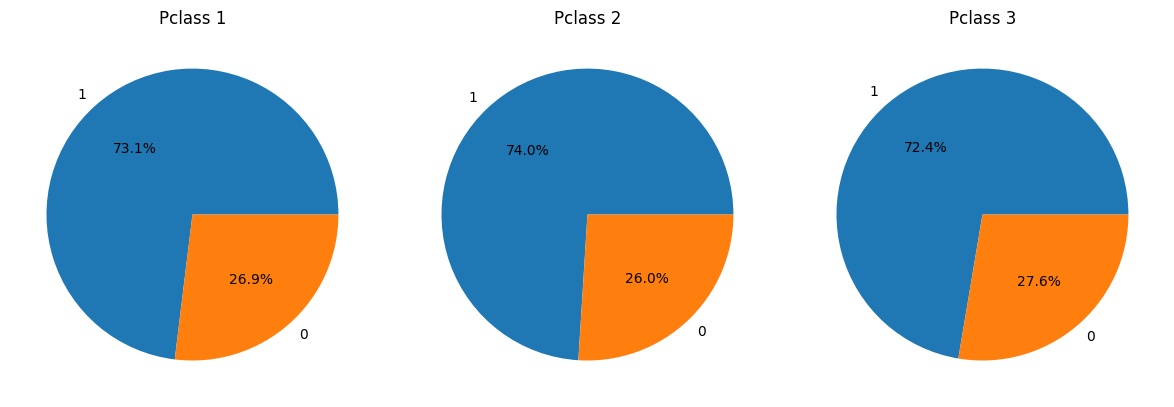

In [44]:
married_counts = df.groupby('Pclass')['is_married'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    married_counts[i+1].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title('Pclass {}'.format(i+1))
    ax.set_ylabel('')


plt.tight_layout()
sns.set()
plt.show()

**Вывод: статус супруга никак не влияет на качество класса**

Построим диаграммы соотношения титулов к классам

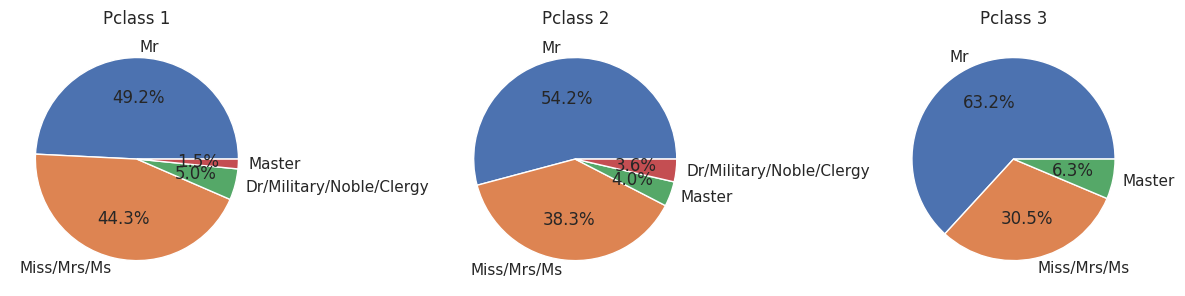

In [45]:
title_counts = df.groupby('Pclass')['Title'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    title_counts[i+1].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title('Pclass {}'.format(i+1))
    ax.set_ylabel('')


plt.tight_layout()
sns.set()
plt.show()

**Вывод: благородные звания были только в 1 и 2 классах. Самое большой процент несовершеннолетних приходится на 3 класс. Можно предположить, что чем больше семья, тем ниже ее класс**

Построим диграммы соотношения числа семей к каждому классу (будем брать семьи от 3 человек)

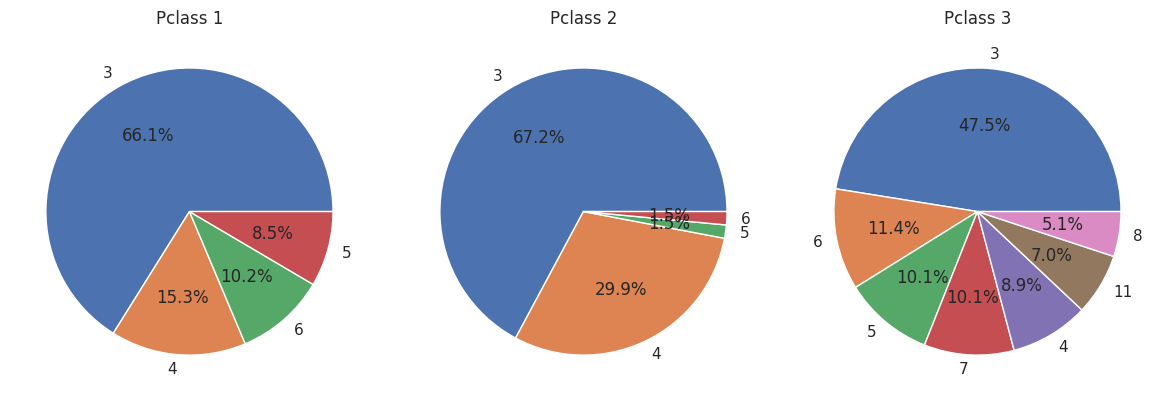

In [46]:
family_size = df.loc[df['Family_size'] >= 3]
size_counts = family_size.groupby('Pclass')['Family_size'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    size_counts[i+1].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title('Pclass {}'.format(i+1))
    ax.set_ylabel('')


plt.tight_layout()
sns.set()
plt.show()

**Вывод: кол-во членов в семье действительно влияет на класс**

Посмотрим сколько всего было мужчин и женщин на борту

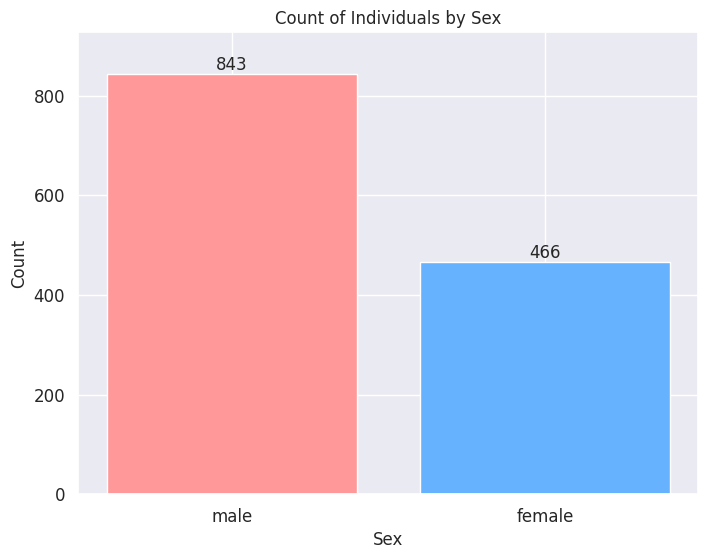

In [47]:
sex_counts = df['Sex'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(sex_counts.index, sex_counts, color=['#FF9999', '#66B2FF'])

for i, count in enumerate(sex_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Count of Individuals by Sex')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(sex_counts) * 1.1)

plt.show()


**Вывод: мужчин было больше женщин почти в 2 раза**

Посмотрим соотношение выживших женщин и мужчин

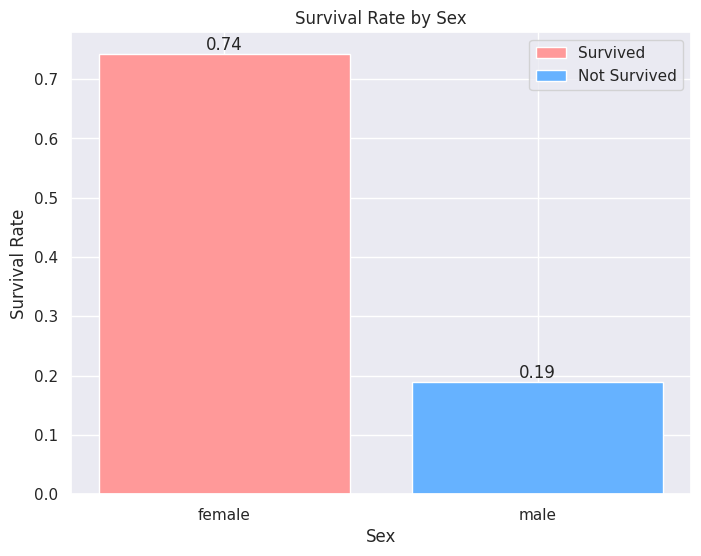

In [48]:
Sex_Survived = df[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(Sex_Survived.index, Sex_Survived['Survived'], color=['#FF9999', '#66B2FF'])

ax.set_xlabel('Sex')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Sex')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height),
            ha='center', va='bottom')

ax.legend(bars, ['Survived', 'Not Survived'])

# Отображение графика
plt.show()


**Вывод: женщины выживали гораздо чаще мужчин**

Посмотрим, зависит ли класс от выживаемости

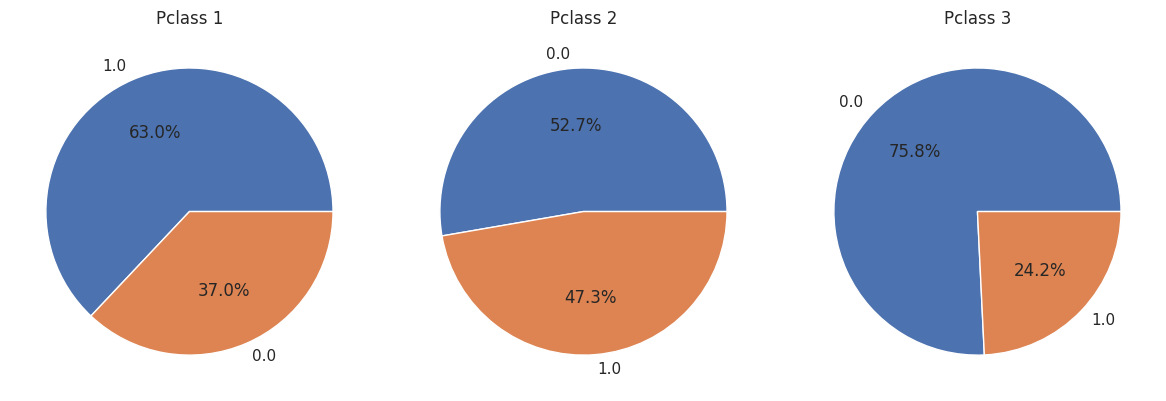

In [50]:
survived_class = df.groupby('Pclass')['Survived'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    survived_class[i+1].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title('Pclass {}'.format(i+1))
    ax.set_ylabel('')


plt.tight_layout()
sns.set()
plt.show()

**Вывод: класс билета прямо влияет на выживаемость. Чем роскошнее класс, тем больше процент выживших**

Посмотрим на каких палубах было безопаснее всего

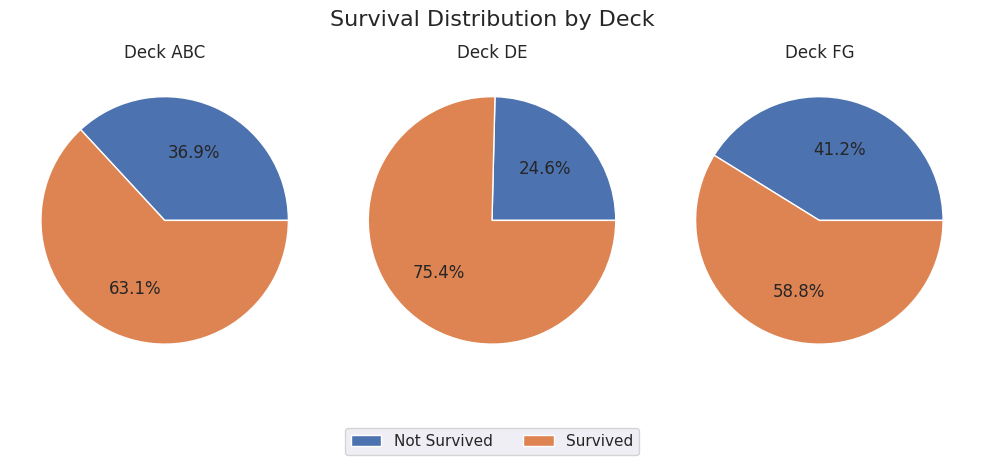

In [71]:
df_deck = df[df['Deck'] != 'M']

deck_survived_counts = df_deck.groupby(['Deck', 'Survived']).size().unstack()

fig, axes = plt.subplots(1, len(deck_survived_counts), figsize=(10, 4))

for i, (deck, ax) in enumerate(zip(deck_survived_counts.index, axes)):
    deck_survived_counts.loc[deck].plot(kind='pie', ax=ax, autopct='%1.1f%%', legend=False, labels=None)
    ax.set_title(f'Deck {deck}')
    ax.set_ylabel('')

fig.suptitle('Survival Distribution by Deck', fontsize=16)
plt.tight_layout()

legend_labels = ['Not Survived', 'Survived']
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=len(legend_labels))

plt.show()


**Вывод: чаще всего выживали люди с палуб D,E**

# Кодировка признаков

Закодируем с помощью LabelEncoder признаки типа object:

In [72]:
label_encoder = LabelEncoder()

non_numerical_cols =  [col for col in df.columns if df[col].dtype == 'object']
for feature in non_numerical_cols:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [73]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size,Title,is_married
349,350,0.00,3,1,42,0,0,8.66,2,3,1,3,1
470,471,0.00,3,1,28,0,0,7.25,2,3,1,3,1
311,1203,NaN,3,1,22,0,0,7.22,0,3,1,3,1
145,146,0.00,2,1,19,1,1,36.75,2,3,3,3,1
791,792,0.00,2,1,16,0,0,26.00,2,3,1,3,1


Применим кодирование "One Hot Encoding" для неупорядоченных признаков, то есть для тех признаков, которые имеют низкую мощность (низкую кардинальность).

In [74]:
low_card_cols = [col for col in non_numerical_cols if len(df[col].unique()) < 15]
low_card_cols

['Sex', 'Embarked', 'Deck', 'Title']

In [75]:
encoded_features = []

for feature in low_card_cols:
    encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
    n = df[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df.index
    encoded_features.append(encoded_df)

df = pd.concat([df, *encoded_features[:9]], axis=1)

In [76]:
df = df.drop(low_card_cols,axis=1)

In [77]:
df_train = df[df['Survived'].notna()]
df_test = df[df['Survived'].isna()]

In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,is_married,Sex_1,...,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Title_1,Title_2,Title_3,Title_4
0,1,0.00,3,22,1,0,7.25,2,1,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,2,1.00,1,38,1,0,71.28,2,1,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,3,1.00,3,26,0,0,7.92,1,0,1.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,4,1.00,1,35,1,0,53.10,2,1,1.00,...,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,5,0.00,3,35,0,0,8.05,1,1,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


# ML

Для начала разделим данные

In [79]:
X = df_train.drop(columns = ['Survived'],axis = 1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.25)

Сравним следующие модели:

*   Логистическая регрессия (LogisticRegression);
*   K-NN метод (KNeighborsClassifier);
*   Метод опорных векторов (SVC);
*   Наивный байесовский классификатор (GaussianNB);
*   Дерево решений (DecisionTreeClassifier);
*   Случайные деревья решений (RandomForestClassifier).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


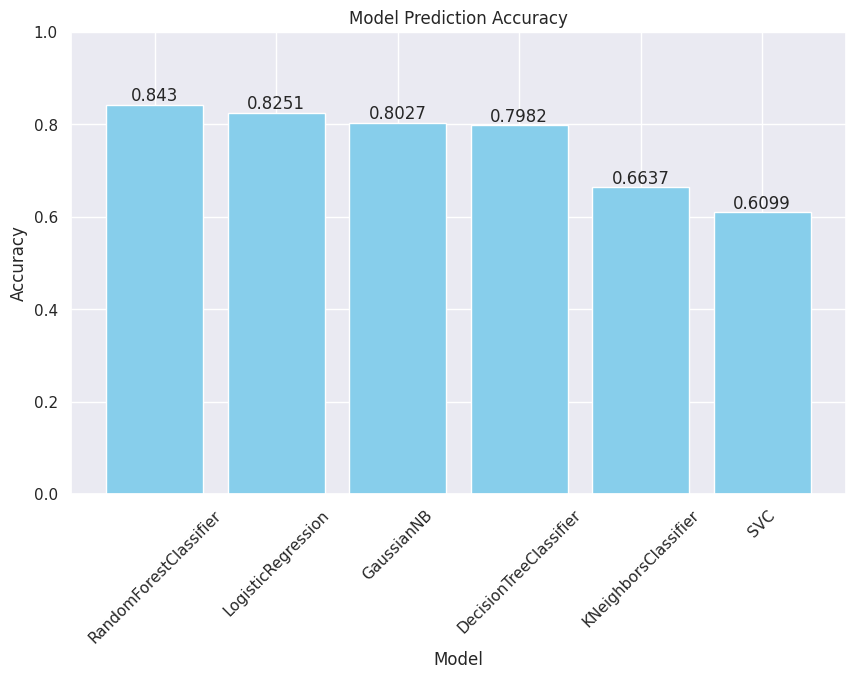

In [80]:
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

accuracies = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred).round(4)
    accuracies.append(acc)

# Сортировка моделей по убыванию точности
classifiers_sorted = [classifier.__class__.__name__ for _, classifier in sorted(zip(accuracies, classifiers), reverse=True)]
accuracies_sorted = sorted(accuracies, reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(classifiers_sorted, accuracies_sorted, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Prediction Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Добавление значения точности над каждым столбцом
for i, acc in enumerate(accuracies_sorted):
    plt.text(i, acc, str(acc), ha='center', va='bottom')

plt.show()

**Вывод: с небольшим отрывом, при параметрах по умолчанию, случайные деревья решений (RandomForestClassifier) справляются лучше всего**

Подберем для RandomForestClassifier параметры с помощью GridSearchCV

In [81]:
parametrs = { 'n_estimators': [450,500,550],
              'max_depth': [15,20,24],
              'min_samples_leaf': [1,5,10],
              'min_samples_split': [2,10,20],
              'random_state': [42] }

RFC = RandomForestClassifier()
grid = GridSearchCV(estimator=RFC, param_grid=parametrs, cv=5)
grid.fit(X_train, y_train)

grid.best_params_
RFC_y_pred = grid.predict(X_test)

print(accuracy_score(y_test, RFC_y_pred).round(3))
print("Best parameters: ", grid.best_params_)

0.83
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 42}


Сравним 2 результата

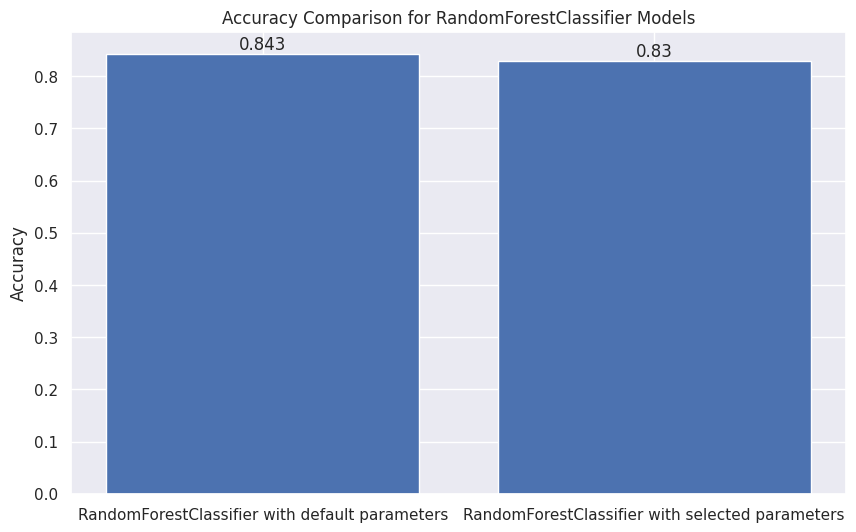

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(['RandomForestClassifier with default parameters', 'RandomForestClassifier with selected parameters'], [accuracies[3], accuracy_score(y_test, RFC_y_pred).round(3)])
plt.title('Accuracy Comparison for RandomForestClassifier Models')
plt.ylabel('Accuracy')
for i, acc in enumerate([accuracies[3], accuracy_score(y_test, RFC_y_pred).round(3)]):
  plt.text(i, acc, str(acc), ha='center', va='bottom')
plt.show()

Модель с признаками по умолчанию немного лучше модели с подобранными параметрами. Будем использовать случайные деревья решений с параметрами по умолчанию

In [83]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

dump(final_model, 'survived_pred.pkl')

['survived_pred.pkl']

# Предсказание выживших

In [84]:
loaded_model = load('survived_pred.pkl')

In [85]:
df_test = df_test.drop(columns = ['Survived'],axis = 1)

In [86]:
predictions = loaded_model.predict(df_test)

In [87]:
df_test['Survived'] = predictions

In [88]:
submission.sample(5)

,PassengerId,Survived
55,947,0
134,1026,0
0,892,0
414,1306,1
318,1210,0


In [89]:
predicted_survived_df = submission.merge(df_test[['PassengerId', 'Survived']], on='PassengerId', how='left').drop(columns = ['Survived_x'],axis = 1).astype(int)
predicted_survived_df.rename(columns={'Survived_y': 'Survived'}, inplace=True)
predicted_survived_df.sample(5)

,PassengerId,Survived
402,1294,1
369,1261,0
416,1308,0
414,1306,1
33,925,0


In [90]:
predicted_survived_df.to_csv('/content/drive/My Drive/pred_survived.csv', index=False)

# Итог

В данном проекте на основе участия в соревновании Kaggle "Titanic: Machine Learning from Disaster" была поставлена цель предсказать, какие пассажиры выживут, а какие нет, используя различные алгоритмы классификации:

*   Логистическая регрессия (LogisticRegression);
*   Метод ближайших соседей (KNeighborsClassifier);
*   Метод опорных векторов (SVC);
*   Наивный байесовский классификатор (GaussianNB);
*   Дерево решений (DecisionTreeClassifier);
*   Случайные деревья решений (RandomForestClassifier).


Проект предоставил возможность изучить и применить основные алгоритмы классификации на реальном наборе данных. Анализ данных, предобработка, выбор и обучение моделей позволили получить прогнозы по выживаемости пассажиров.

Лучше всего себя показал RandomForestClassifier. Accuracy составил 0.843. К сожалению, параметры, улучшающие метрику подобрать не удалось. В конечном итоге, используя стандартный алгоритм классификации с параметрами по умолчанию удалось попасть в 67% среди всех участников соревнования на Kaggle.

В дальнейшем, для улучшения моделей, можно проводить дополнительную предобработку данных, подбирать оптимальные гиперпараметры моделей и рассмотреть другие алгоритмы классификации. Также стоит учесть, что точность моделей может быть повышена путем использования ансамблевых методов, как, например, бэггинг или стекинг.

В целом, данный проект является отличным опытом работы с задачей классификации и предоставляет полезные навыки в анализе данных и построении моделей машинного обучения.


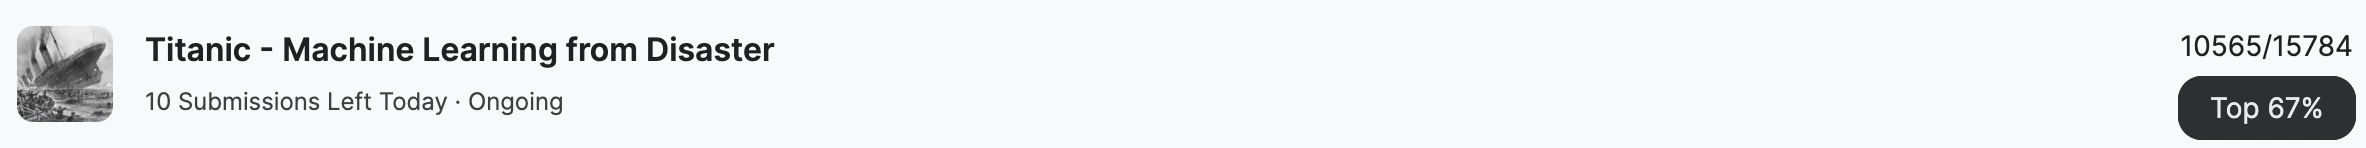